## IMDB 긍부정 실습

In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


### Dataset 불러오기

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

/home/miruware/anaconda3/envs/tf200/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/miruware/anaconda3/envs/tf200/lib/python3.7/site-packages/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print(train_data.shape)
print(test_data.shape)

(25000,)
(25000,)


In [4]:
train_labels[1]

0

### 데이터 탐색

In [5]:
word_index = imdb.get_word_index()

In [6]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [7]:
decode_review = ' '.join([reverse_word_index.get(i - 3, 
                                                 '?') for i in train_data[0]])
decode_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 입력 데이터 준비

In [8]:
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension)이고 원소가 0인 행렬을 만들어준다
    results = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # result[i]에서 특정 인덱스 위치를 1로 만들어준다.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


## 신경망 모델 만들기

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10000,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [19]:
model.compile(tf.keras.optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [20]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 320us/sample - loss: 0.3572 - accuracy: 0.8539 - val_loss: 0.2800 - val_accuracy: 0.8901
Epoch 2/20
15000/15000 [==============================] - 4s 236us/sample - loss: 0.2014 - accuracy: 0.9237 - val_loss: 0.2906 - val_accuracy: 0.8856
Epoch 3/20
15000/15000 [==============================] - 4s 247us/sample - loss: 0.1521 - accuracy: 0.9425 - val_loss: 0.3459 - val_accuracy: 0.8749
Epoch 4/20
15000/15000 [==============================] - 4s 263us/sample - loss: 0.1215 - accuracy: 0.9566 - val_loss: 0.3887 - val_accuracy: 0.8758
Epoch 5/20
15000/15000 [==============================] - 3s 230us/sample - loss: 0.0957 - accuracy: 0.9662 - val_loss: 0.4082 - val_accuracy: 0.8757
Epoch 6/20
15000/15000 [==============================] - 3s 227us/sample - loss: 0.0756 - accuracy: 0.9735 - val_loss: 0.4683 - val_accuracy: 0.8746
Epoch 7/20
15000/15000 [==========================

In [22]:
import matplotlib.pyplot as plt

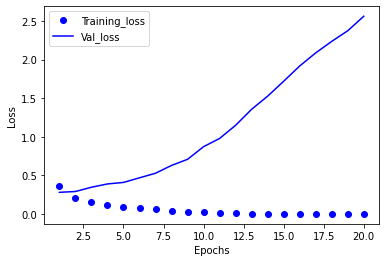

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training_loss')
plt.plot(epochs, val_loss, 'b', label='Val_loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

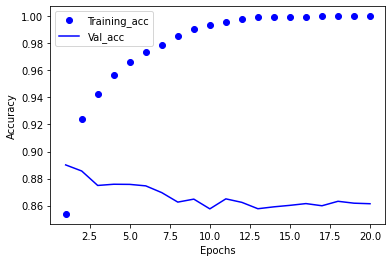

In [24]:
plt.plot(epochs, acc, 'bo', label='Training_acc')
plt.plot(epochs, val_acc, 'b', label='Val_acc')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 적은 층, 많은 층 모델 빌드

In [25]:
from tensorflow.keras import models
from tensorflow.keras import layers

model_small = models.Sequential([
    layers.Dense(4, activation='relu', input_shape=(10000,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_small.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_small = model_small.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 288us/sample - loss: 0.5432 - accuracy: 0.7895 - val_loss: 0.4377 - val_accuracy: 0.8739
Epoch 2/20
15000/15000 [==============================] - 3s 223us/sample - loss: 0.2952 - accuracy: 0.9061 - val_loss: 0.2911 - val_accuracy: 0.8840
Epoch 3/20
15000/15000 [==============================] - 3s 228us/sample - loss: 0.1922 - accuracy: 0.9317 - val_loss: 0.2943 - val_accuracy: 0.8851
Epoch 4/20
15000/15000 [==============================] - 3s 232us/sample - loss: 0.1544 - accuracy: 0.9477 - val_loss: 0.3057 - val_accuracy: 0.8825
Epoch 5/20
15000/15000 [==============================] - 3s 224us/sample - loss: 0.1291 - accuracy: 0.9573 - val_loss: 0.3237 - val_accuracy: 0.8839
Epoch 6/20
15000/15000 [==============================] - 3s 224us/sample - loss: 0.1105 - accuracy: 0.9635 - val_loss: 0.3489 - val_accuracy: 0.8799
Epoch 7/20
15000/15000 [==========================

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers

model_big = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(10000,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_big.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_big = model_small.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 239us/sample - loss: 0.0204 - accuracy: 0.9941 - val_loss: 0.8918 - val_accuracy: 0.8576
Epoch 2/20
15000/15000 [==============================] - 4s 234us/sample - loss: 0.0178 - accuracy: 0.9950 - val_loss: 0.9392 - val_accuracy: 0.8565
Epoch 3/20
15000/15000 [==============================] - 3s 231us/sample - loss: 0.0161 - accuracy: 0.9956 - val_loss: 0.9950 - val_accuracy: 0.8576
Epoch 4/20
15000/15000 [==============================] - 3s 232us/sample - loss: 0.0149 - accuracy: 0.9958 - val_loss: 1.0467 - val_accuracy: 0.8561
Epoch 5/20
15000/15000 [==============================] - 3s 231us/sample - loss: 0.0139 - accuracy: 0.9957 - val_loss: 1.1316 - val_accuracy: 0.8578
Epoch 6/20
15000/15000 [==============================] - 4s 235us/sample - loss: 0.0129 - accuracy: 0.9961 - val_loss: 1.1805 - val_accuracy: 0.8561
Epoch 7/20
15000/15000 [==========================

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

acc_small = history_small.history['accuracy']
val_acc_small = history_small.history['val_accuracy']
loss_small = history_small.history['loss']
val_loss_small = history_small.history['val_loss']

acc_big = history_big.history['accuracy']
val_acc_big = history_big.history['val_accuracy']
loss_big = history_big.history['loss']
val_loss_big = history_big.history['val_loss']

epochs = range(1, len(acc) + 1)

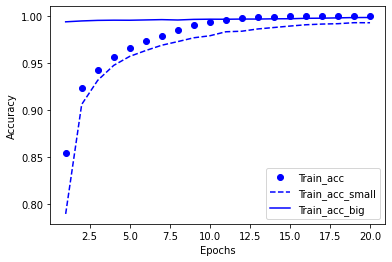

In [28]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Train_acc')
plt.plot(epochs, acc_small, 'b--', label='Train_acc_small')
plt.plot(epochs, acc_big, 'b', label='Train_acc_big')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

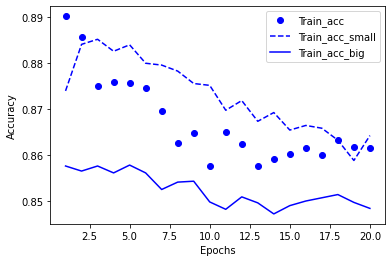

In [29]:
import matplotlib.pyplot as plt

plt.plot(epochs, val_acc, 'bo', label='Train_acc')
plt.plot(epochs, val_acc_small, 'b--', label='Train_acc_small')
plt.plot(epochs, val_acc_big, 'b', label='Train_acc_big')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

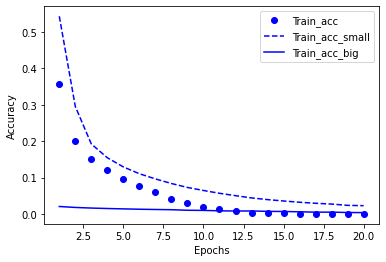

In [30]:
import matplotlib.pyplot as plt

plt.plot(epochs, loss, 'bo', label='Train_acc')
plt.plot(epochs, loss_small, 'b--', label='Train_acc_small')
plt.plot(epochs, loss_big, 'b', label='Train_acc_big')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## L1, L2 Norm 정규화

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model_l2 = models.Sequential([
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_l2.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_l2 = model_l2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 295us/sample - loss: 0.3896 - accuracy: 0.8503 - val_loss: 0.3211 - val_accuracy: 0.8862
Epoch 2/20
15000/15000 [==============================] - 3s 233us/sample - loss: 0.2769 - accuracy: 0.9081 - val_loss: 0.3322 - val_accuracy: 0.8814
Epoch 3/20
15000/15000 [==============================] - 3s 231us/sample - loss: 0.2615 - accuracy: 0.9143 - val_loss: 0.3378 - val_accuracy: 0.8803
Epoch 4/20
15000/15000 [==============================] - 4s 237us/sample - loss: 0.2484 - accuracy: 0.9228 - val_loss: 0.3458 - val_accuracy: 0.8796
Epoch 5/20
15000/15000 [==============================] - 3s 233us/sample - loss: 0.2410 - accuracy: 0.9241 - val_loss: 0.3516 - val_accuracy: 0.8769
Epoch 6/20
15000/15000 [==============================] - 3s 225us/sample - loss: 0.2338 - accuracy: 0.9257 - val_loss: 0.3554 - val_accuracy: 0.8714
Epoch 7/20
15000/15000 [==========================

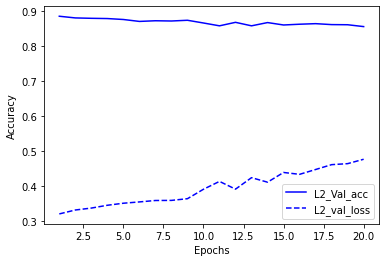

In [35]:
import matplotlib.pyplot as plt

model_l2_val_loss = history_l2.history['val_loss']
model_l2_val_acc = history_l2.history['val_accuracy']

plt.plot(epochs, model_l2_val_acc, 'b', label='L2_Val_acc')
plt.plot(epochs, model_l2_val_loss, 'b--', label='L2_val_loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Dropout 추가

In [37]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

model_drop = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(10000,)),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model_drop.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

history_drop = model_drop.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=50,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 306us/sample - loss: 0.5223 - accuracy: 0.7397 - val_loss: 0.3271 - val_accuracy: 0.8808
Epoch 2/20
15000/15000 [==============================] - 4s 244us/sample - loss: 0.3570 - accuracy: 0.8635 - val_loss: 0.2875 - val_accuracy: 0.8905
Epoch 3/20
15000/15000 [==============================] - 4s 235us/sample - loss: 0.3000 - accuracy: 0.8925 - val_loss: 0.2951 - val_accuracy: 0.8901
Epoch 4/20
15000/15000 [==============================] - 4s 238us/sample - loss: 0.2802 - accuracy: 0.9081 - val_loss: 0.3043 - val_accuracy: 0.8922
Epoch 5/20
15000/15000 [==============================] - 3s 228us/sample - loss: 0.2600 - accuracy: 0.9118 - val_loss: 0.3176 - val_accuracy: 0.8879
Epoch 6/20
15000/15000 [==============================] - 3s 233us/sample - loss: 0.2391 - accuracy: 0.9182 - val_loss: 0.3239 - val_accuracy: 0.8887
Epoch 7/20
15000/15000 [==========================

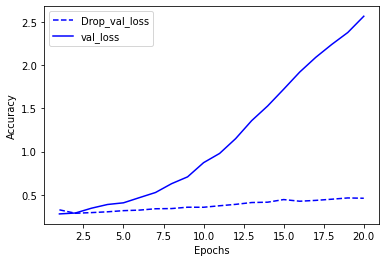

In [38]:
import matplotlib.pyplot as plt

model_drop_val_loss = history_drop.history['val_loss']

plt.plot(epochs, model_drop_val_loss, 'b--', label='Drop_val_loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()